Nama: Nicolaus Reva S
NIM: 225314097

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

1. Reading dataset

In [3]:
data = pd.read_csv('Iris.csv')

In [4]:
data.drop(['Id'], axis=1, inplace=True)

In [5]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Data 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


2. Removing duplicated data

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


3. Frequency distribution of species

In [9]:
iris_outcome = pd.crosstab(index=data['Species'], columns='count')
iris_outcome

col_0,count
Species,
Iris-setosa,48
Iris-versicolor,50
Iris-virginica,49


C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gi

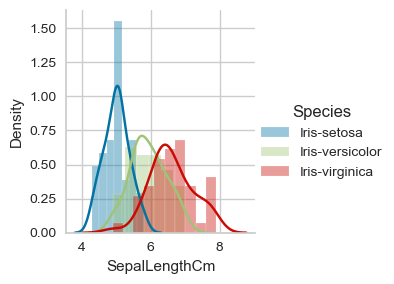

In [10]:
g = sns.FacetGrid(data, hue="Species", height=3)
g.map(sns.distplot, "SepalLengthCm").add_legend()
plt.show()

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gi

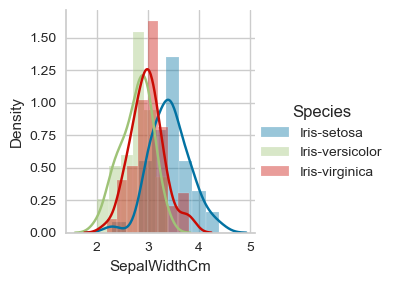

In [11]:
g = sns.FacetGrid(data, hue="Species", height=3)
g.map(sns.distplot, "SepalWidthCm").add_legend()
plt.show()

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gi

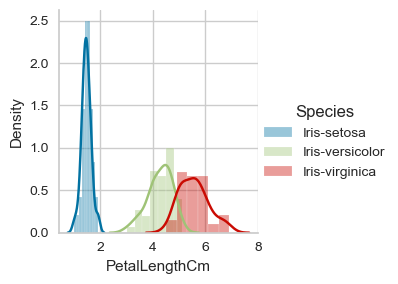

In [12]:
g = sns.FacetGrid(data, hue="Species", height=3)
g.map(sns.distplot, "PetalLengthCm").add_legend()
plt.show()

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gi

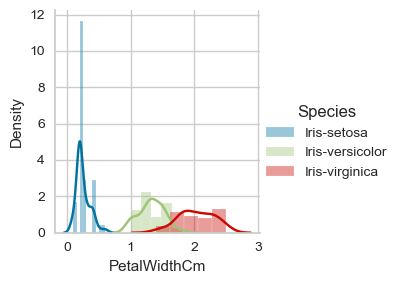

In [13]:
g = sns.FacetGrid(data, hue="Species", height=3)
g.map(sns.distplot, "PetalWidthCm").add_legend()
plt.show()

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

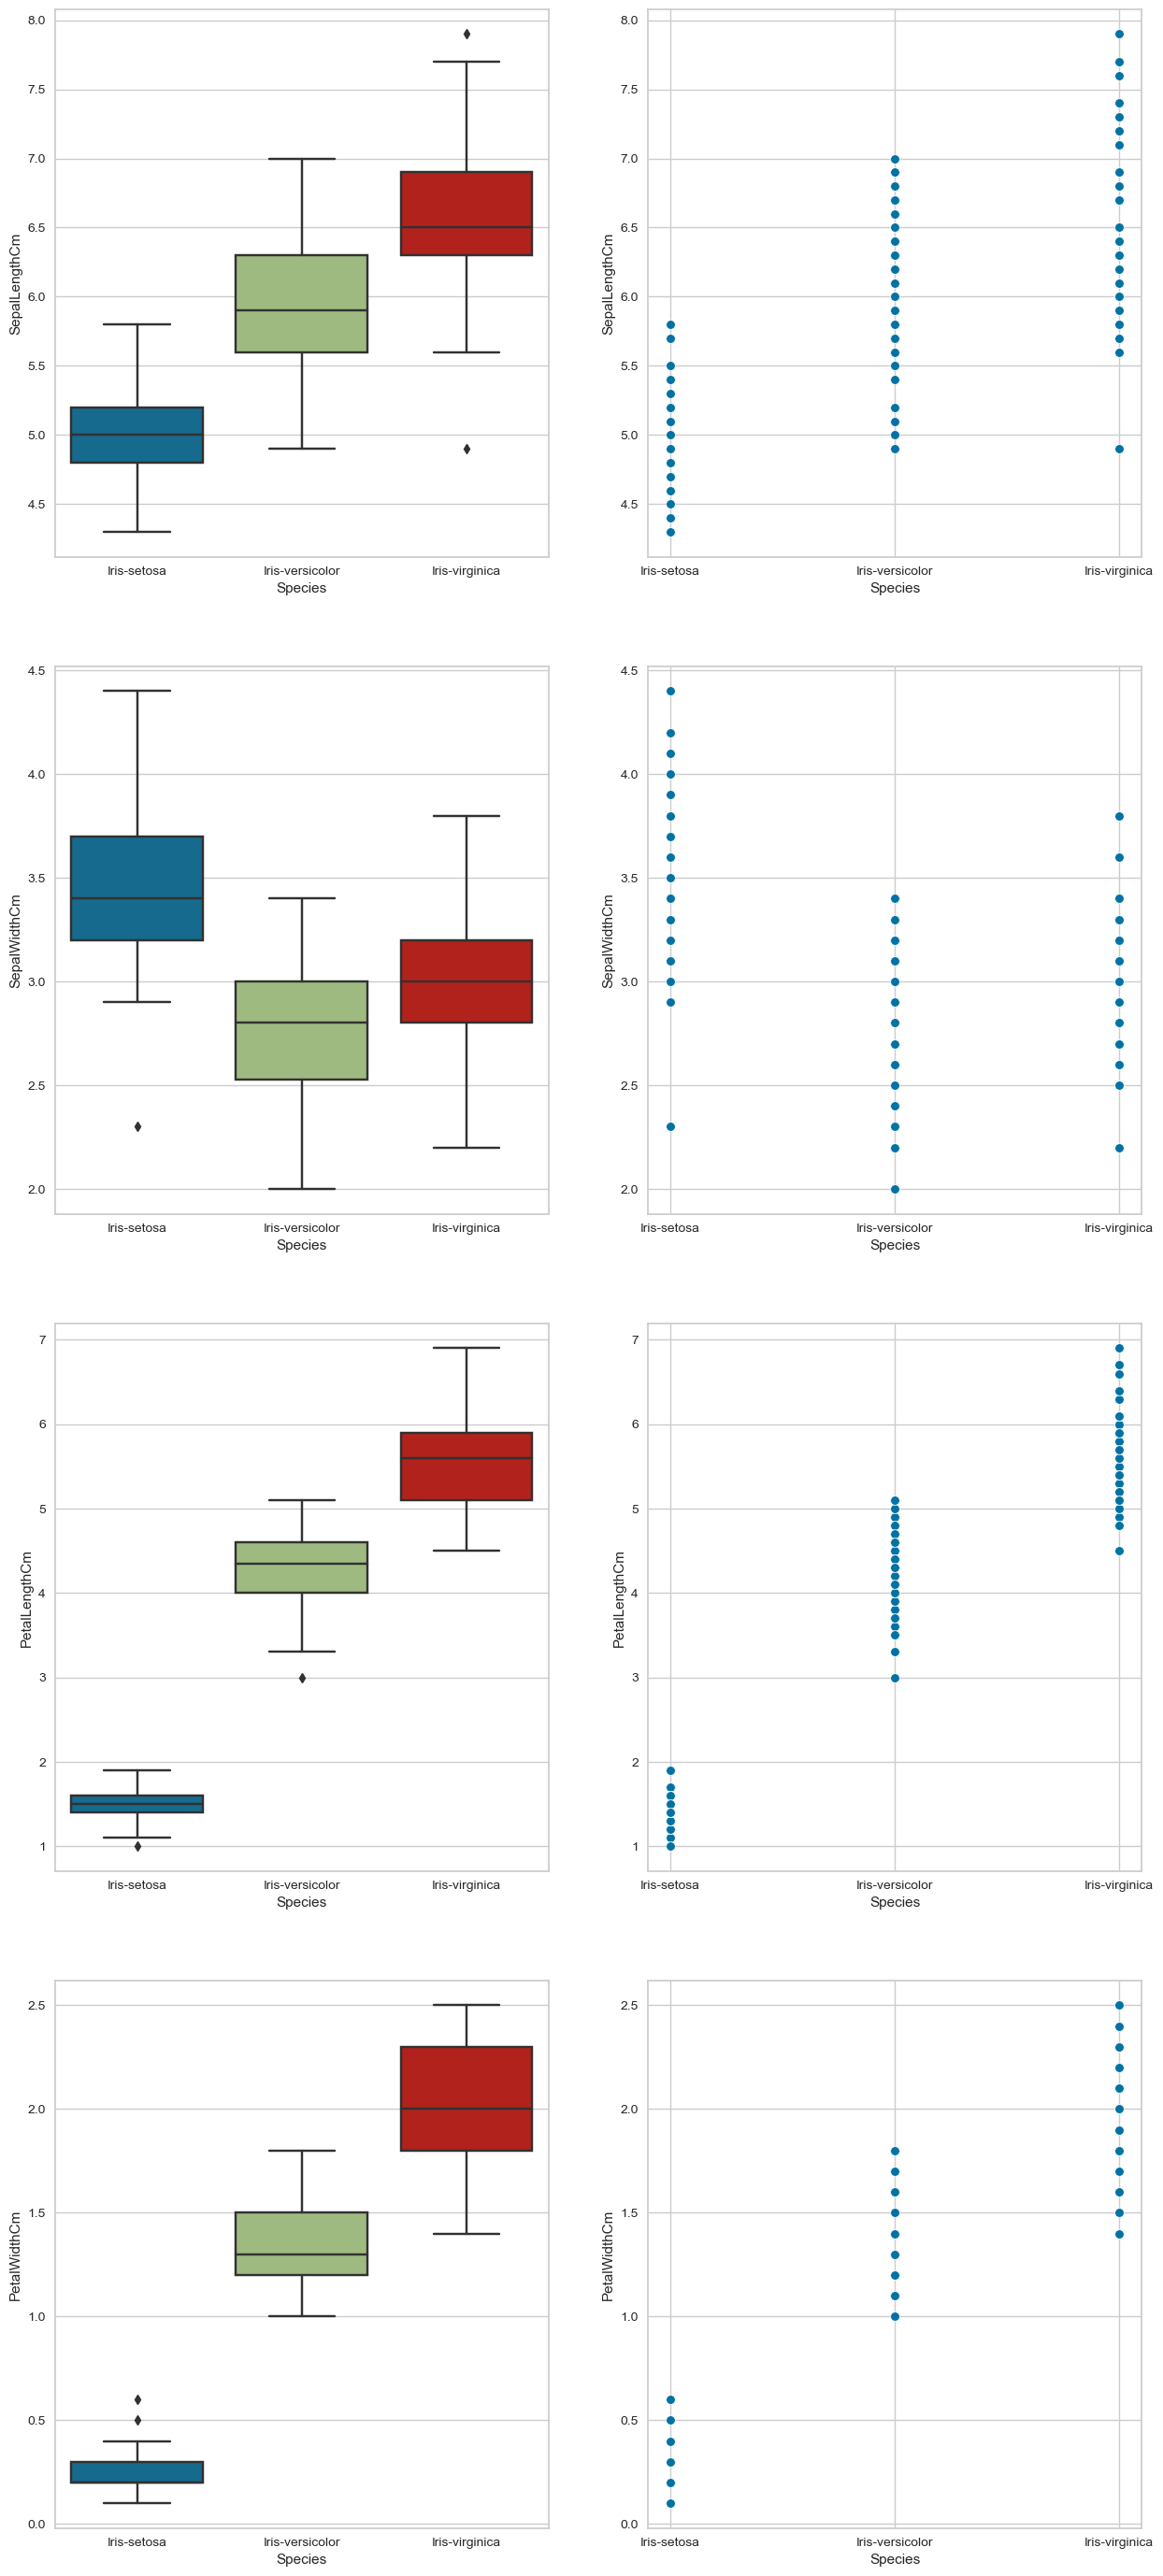

In [14]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 35))

sns.boxplot(x='Species', y='SepalLengthCm', data=data, ax=axs[0, 0])
sns.scatterplot(x='Species', y='SepalLengthCm', data=data, ax=axs[0, 1])

sns.boxplot(x='Species', y='SepalWidthCm', data=data, ax=axs[1, 0])
sns.scatterplot(x='Species', y='SepalWidthCm', data=data, ax=axs[1, 1])

sns.boxplot(x='Species', y='PetalLengthCm', data=data, ax=axs[2, 0])
sns.scatterplot(x='Species', y='PetalLengthCm', data=data, ax=axs[2, 1])

sns.boxplot(x='Species', y='PetalWidthCm', data=data, ax=axs[3, 0])
sns.scatterplot(x='Species', y='PetalWidthCm', data=data, ax=axs[3, 1])
plt.show()

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

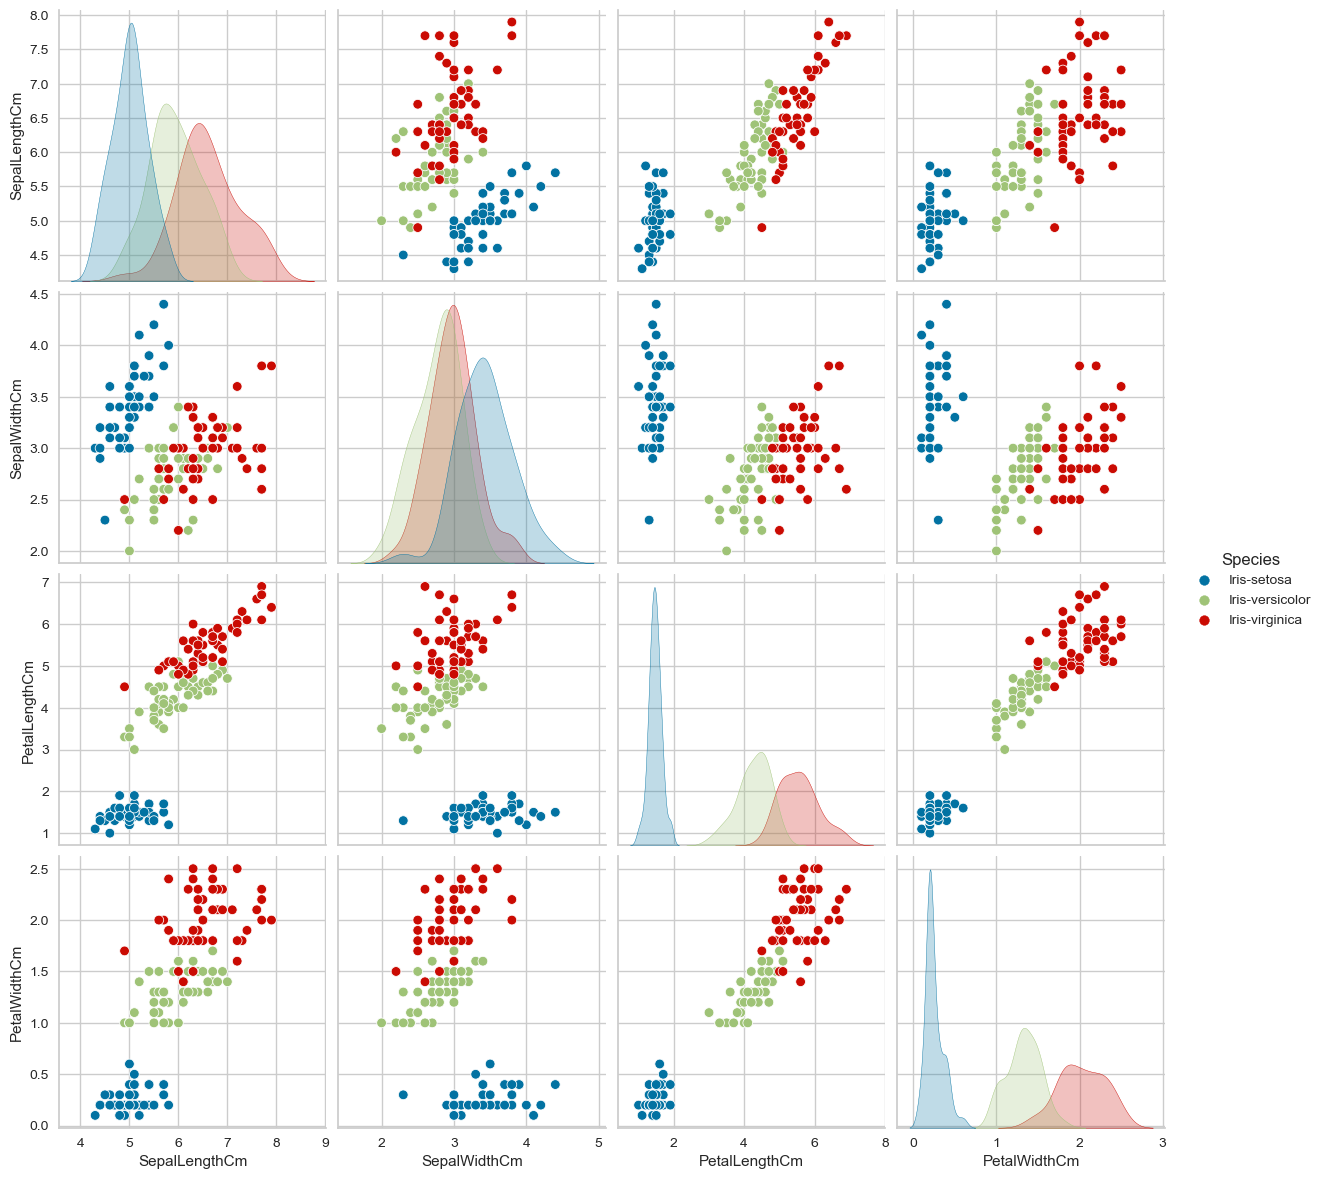

In [15]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="Species",size=3)
plt.show()

4. Outliers handling

In [16]:
miss_oulier_data = data.copy()
miss_oulier_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
for i in data.columns[0:-1]:
    for specy in data['Species'].unique():
        specy_type = data[data['Species'] == specy]
        selected_column = specy_type[i]
        q1 = selected_column.quantile(0.25)
        q3 = selected_column.quantile(0.75)
        iqr = q3-q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        outliers = selected_column[(selected_column > upper_limit) | (selected_column < lower_limit)].index
        print(outliers)
        miss_oulier_data.drop(index=outliers, inplace=True)
        

Index([], dtype='int64')
Index([], dtype='int64')
Index([106, 131], dtype='int64')
Index([41], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([22], dtype='int64')
Index([98], dtype='int64')
Index([], dtype='int64')
Index([23, 43], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')


C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

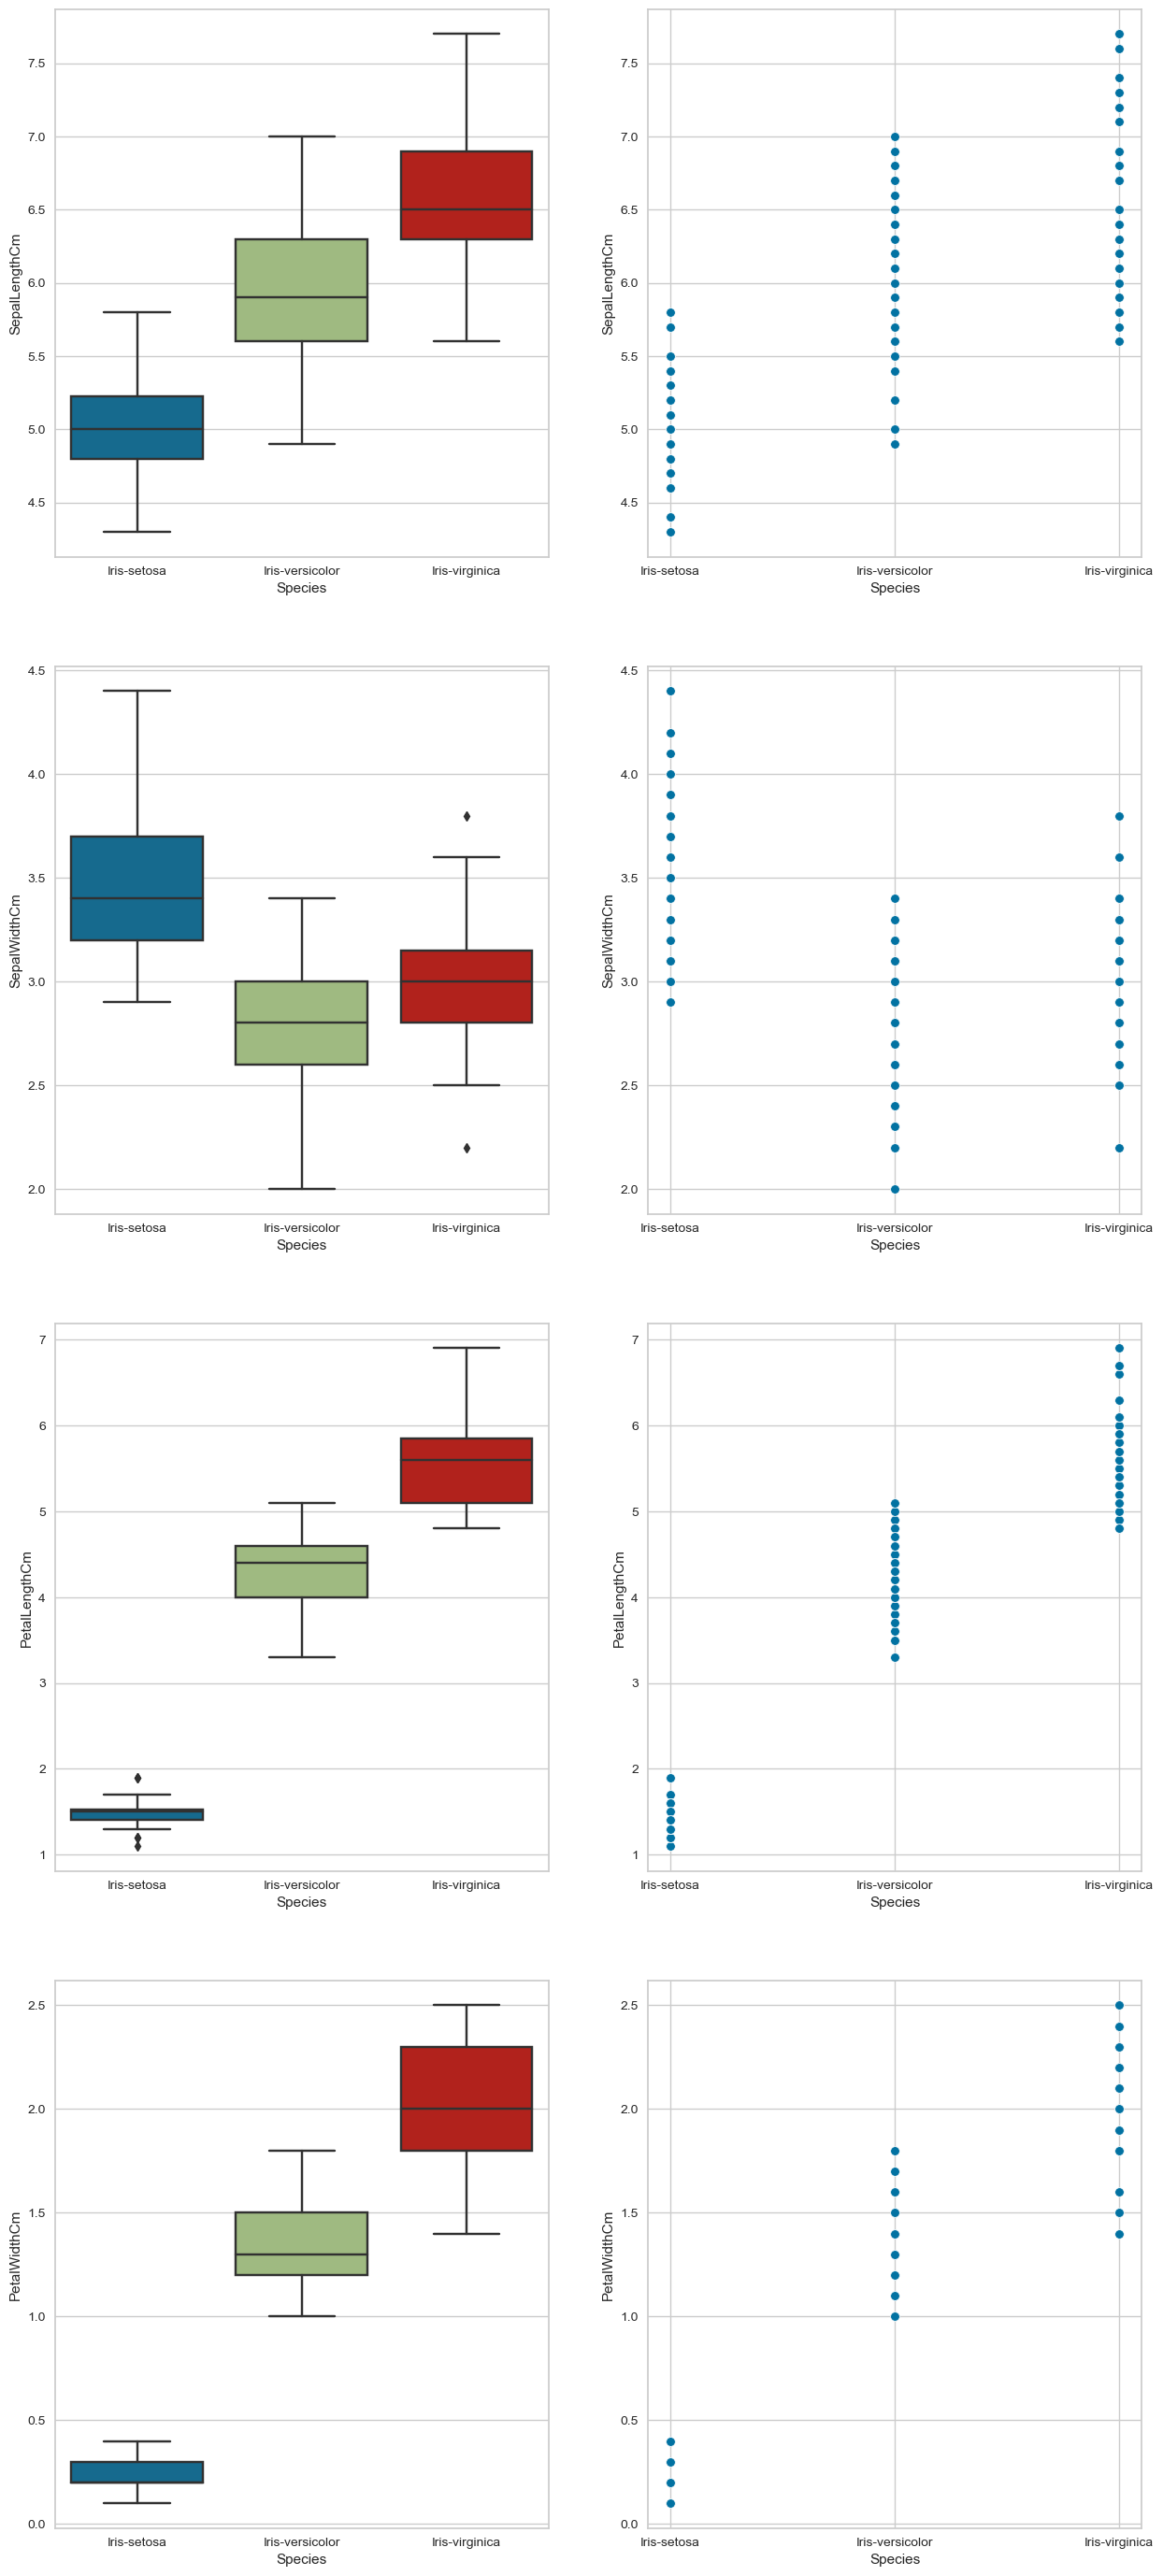

In [18]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 35))

sns.boxplot(x='Species', y='SepalLengthCm', data=miss_oulier_data, ax=axs[0, 0])
sns.scatterplot(x='Species', y='SepalLengthCm', data=miss_oulier_data, ax=axs[0, 1])

sns.boxplot(x='Species', y='SepalWidthCm', data=miss_oulier_data, ax=axs[1, 0])
sns.scatterplot(x='Species', y='SepalWidthCm', data=miss_oulier_data, ax=axs[1, 1])

sns.boxplot(x='Species', y='PetalLengthCm', data=miss_oulier_data, ax=axs[2, 0])
sns.scatterplot(x='Species', y='PetalLengthCm', data=miss_oulier_data, ax=axs[2, 1])

sns.boxplot(x='Species', y='PetalWidthCm', data=miss_oulier_data, ax=axs[3, 0])
sns.scatterplot(x='Species', y='PetalWidthCm', data=miss_oulier_data, ax=axs[3, 1])
plt.show()

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

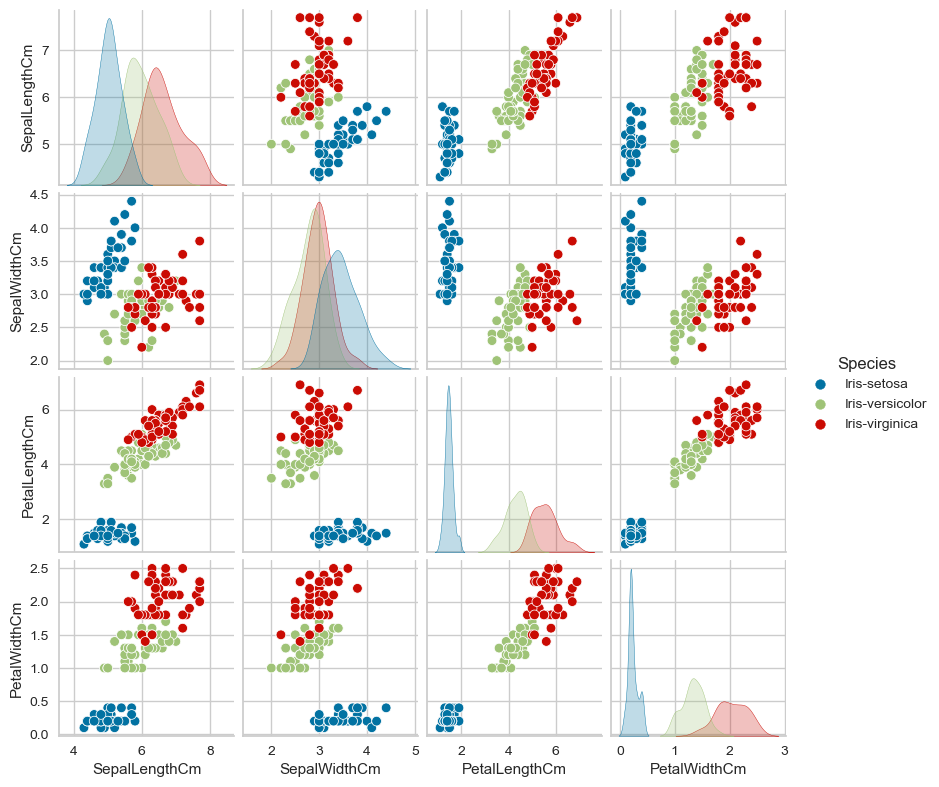

In [19]:
sns.set_style("whitegrid")
sns.pairplot(miss_oulier_data,hue="Species",size=2)
plt.show()

In [20]:
le = LabelEncoder()
miss_oulier_data['Species'] = le.fit_transform(miss_oulier_data['Species'])
miss_oulier_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


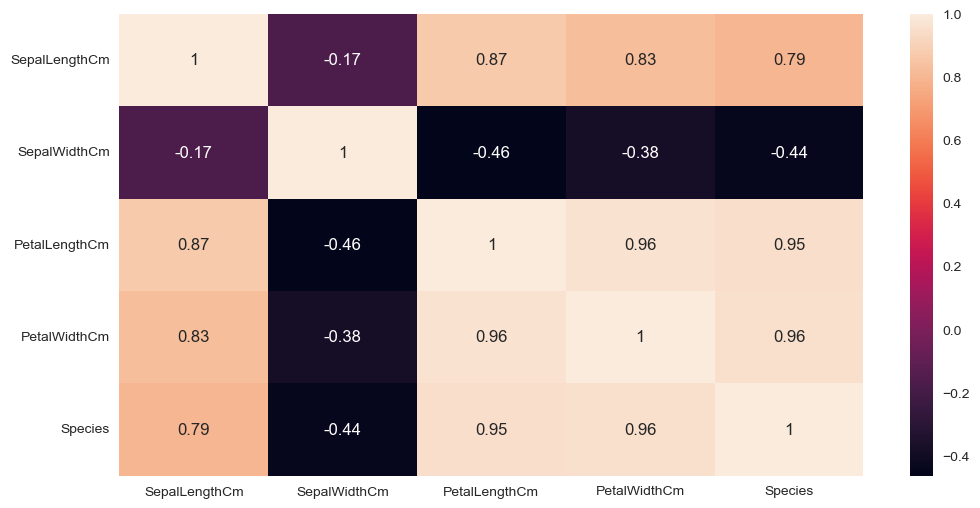

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(miss_oulier_data.corr(), annot=True)
plt.show()

In [22]:
miss_oulier_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  140 non-null    float64
 1   SepalWidthCm   140 non-null    float64
 2   PetalLengthCm  140 non-null    float64
 3   PetalWidthCm   140 non-null    float64
 4   Species        140 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.0 KB


In [23]:
miss_oulier_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,140.000000,140.00000,140.000000,140.000000,140.000000
mean,5.884286,3.05500,3.830000,1.223571,1.021429
std,0.804061,0.42904,1.739292,0.759743,0.808835
min,4.300000,2.00000,1.100000,0.100000,0.000000
25%,5.200000,2.80000,1.600000,0.300000,0.000000
50%,5.800000,3.00000,4.400000,1.300000,1.000000
75%,6.400000,3.30000,5.100000,1.800000,2.000000
max,7.700000,4.40000,6.900000,2.500000,2.000000


5. Scaling data using zscore and MinMax for fastest calculating in machine learning model

In [24]:
minmax = MinMaxScaler()
minmax_data = miss_oulier_data.copy()
minmax_data = minmax.fit_transform(minmax_data)

In [25]:
minmax_data

array([[0.23529412, 0.625     , 0.05172414, 0.04166667, 0.        ],
       [0.17647059, 0.41666667, 0.05172414, 0.04166667, 0.        ],
       [0.11764706, 0.5       , 0.03448276, 0.04166667, 0.        ],
       [0.08823529, 0.45833333, 0.06896552, 0.04166667, 0.        ],
       [0.20588235, 0.66666667, 0.05172414, 0.04166667, 0.        ],
       [0.32352941, 0.79166667, 0.10344828, 0.125     , 0.        ],
       [0.08823529, 0.58333333, 0.05172414, 0.08333333, 0.        ],
       [0.20588235, 0.58333333, 0.06896552, 0.04166667, 0.        ],
       [0.02941176, 0.375     , 0.05172414, 0.04166667, 0.        ],
       [0.17647059, 0.45833333, 0.06896552, 0.        , 0.        ],
       [0.32352941, 0.70833333, 0.06896552, 0.04166667, 0.        ],
       [0.14705882, 0.58333333, 0.0862069 , 0.04166667, 0.        ],
       [0.14705882, 0.41666667, 0.05172414, 0.        , 0.        ],
       [0.        , 0.41666667, 0.        , 0.        , 0.        ],
       [0.44117647, 0.83333333, 0.

6. Elbow Method for clustering

In [26]:
X = minmax_data[:, :-1]
y = minmax_data[:, -1]

In [27]:
X

array([[0.23529412, 0.625     , 0.05172414, 0.04166667],
       [0.17647059, 0.41666667, 0.05172414, 0.04166667],
       [0.11764706, 0.5       , 0.03448276, 0.04166667],
       [0.08823529, 0.45833333, 0.06896552, 0.04166667],
       [0.20588235, 0.66666667, 0.05172414, 0.04166667],
       [0.32352941, 0.79166667, 0.10344828, 0.125     ],
       [0.08823529, 0.58333333, 0.05172414, 0.08333333],
       [0.20588235, 0.58333333, 0.06896552, 0.04166667],
       [0.02941176, 0.375     , 0.05172414, 0.04166667],
       [0.17647059, 0.45833333, 0.06896552, 0.        ],
       [0.32352941, 0.70833333, 0.06896552, 0.04166667],
       [0.14705882, 0.58333333, 0.0862069 , 0.04166667],
       [0.14705882, 0.41666667, 0.05172414, 0.        ],
       [0.        , 0.41666667, 0.        , 0.        ],
       [0.44117647, 0.83333333, 0.01724138, 0.04166667],
       [0.41176471, 1.        , 0.06896552, 0.125     ],
       [0.32352941, 0.79166667, 0.03448276, 0.125     ],
       [0.23529412, 0.625     ,

In [28]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-pack

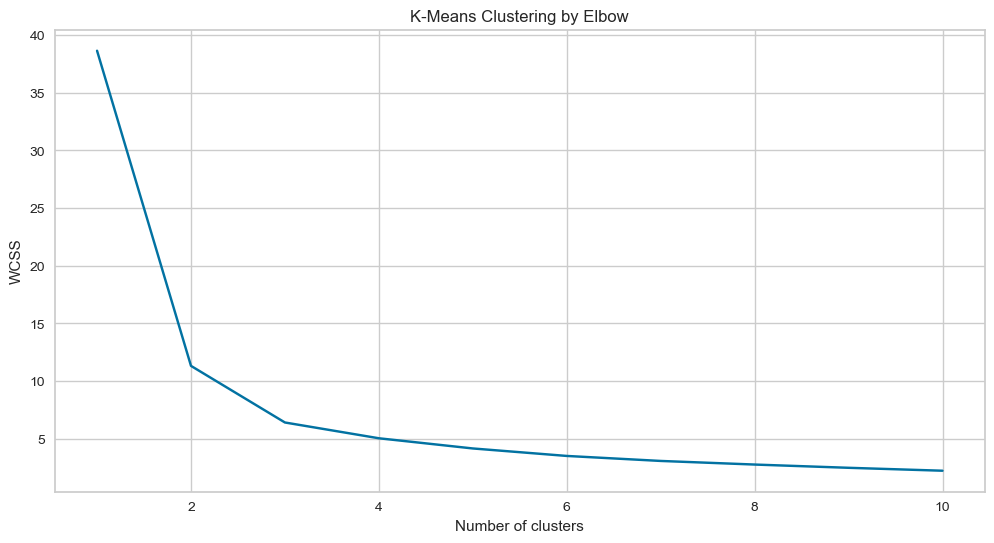

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering by Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
for i in range(len(wcss)):
    print(f'{i+1}: {wcss[i]}')

1: 38.64495220538438
2: 11.314346667245022
3: 6.404931601704918
4: 5.036498068970063
5: 4.153207036258159
6: 3.504508713498533
7: 3.070418448995425
8: 2.7577308000044773
9: 2.4759743745312575
10: 2.222435817199005


In [51]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=100, random_state=42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


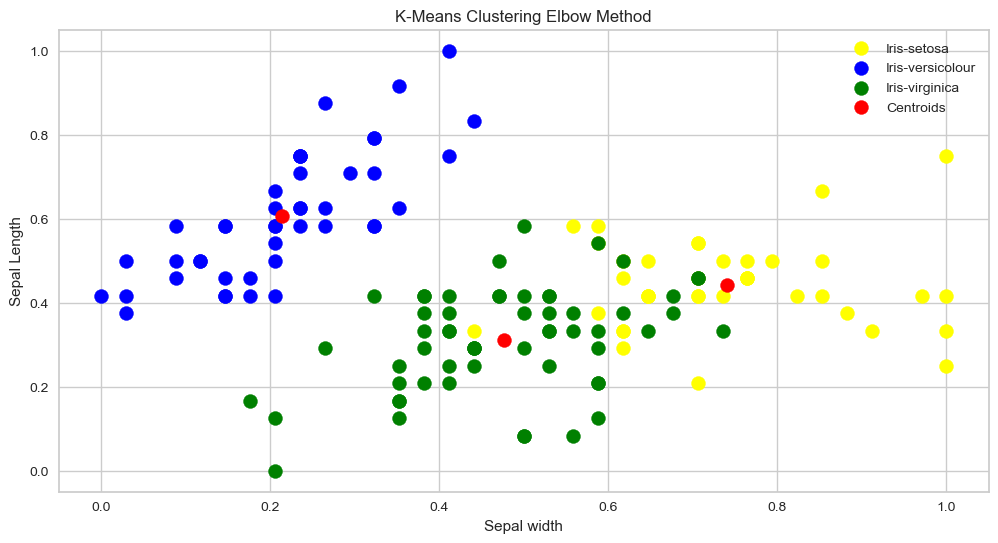

In [52]:
plt.figure(figsize=(12, 6))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='yellow', label='Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0] ,kmeans.cluster_centers_[:, 1],s=100 , c='red', label='Centroids')
plt.title('K-Means Clustering Elbow Method')
plt.xlabel('Sepal width')
plt.ylabel('Sepal Length')
plt.legend()

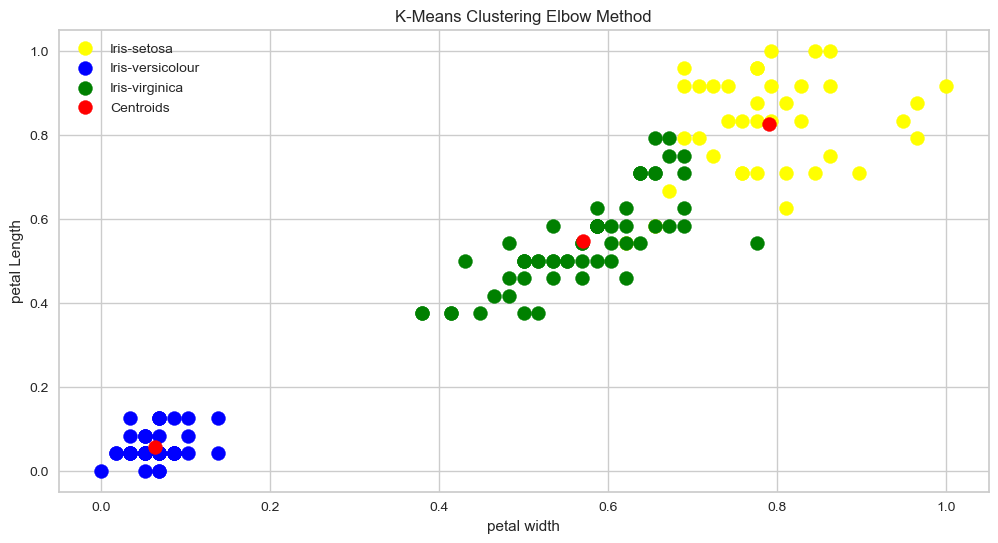

In [53]:
plt.figure(figsize=(12, 6))

plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s=100, c='yellow', label='Iris-setosa')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s=100, c='blue', label='Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s=100, c='green', label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 2] ,kmeans.cluster_centers_[:, 3],s=100 , c='red', label='Centroids')
plt.title('K-Means Clustering Elbow Method')
plt.xlabel('petal width')
plt.ylabel('petal Length')
plt.legend()

In [54]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2])

In [55]:
y_true = miss_oulier_data['Species'].values
y_true_mod = np.where(y_true == 0, 1, np.where(y_true == 1, 2, 0))
y_true_mod

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

Check the similarity by y_true and y_kmeans

In [56]:
print(np.concatenate((y_kmeans.reshape(len(y_kmeans), 1), y_true_mod.reshape(len(y_true_mod), 1)), 1))

0.0
[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 2]
 [2 2]
 [0 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [0 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [2 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 0]
 [0 0]
 [2 0]
 [0 0]
 [2 0]
 [0 0]
 [0 0]
 [2 0]
 [2 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 0]
 [2 0]
 [0 0]
 [0 0]
 [0 0]
 [2 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 0]
 [0 0]
 [0 0]
 [2 0]]


7. Silhoutee 

In [38]:
silhouette_scores = []

for i in range (2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-pack

Text(0, 0.5, 'Silhouette')

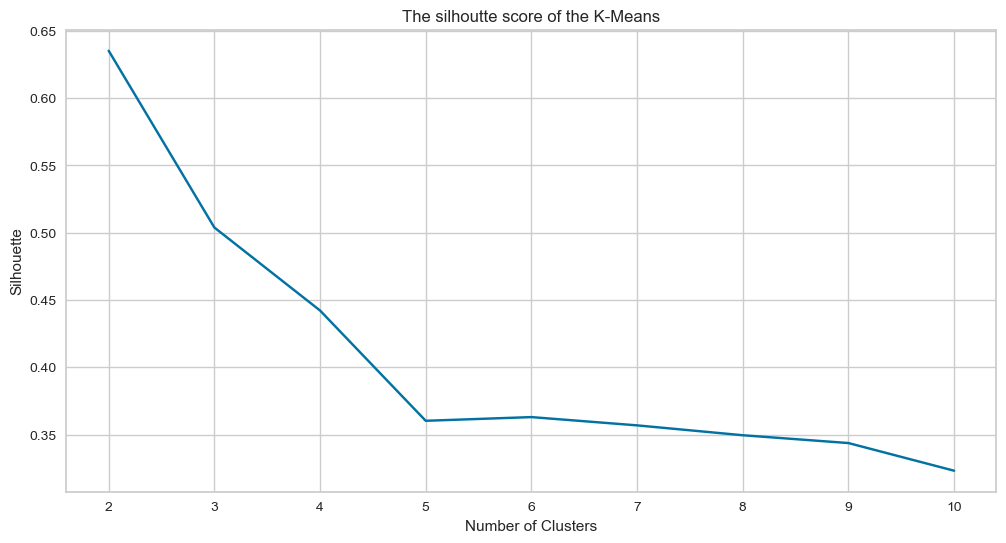

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), silhouette_scores)
plt.title('The silhoutte score of the K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette')

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


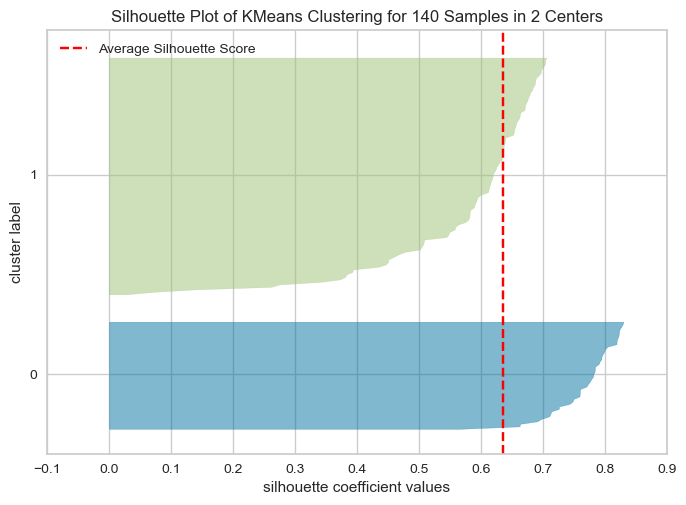

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 140 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
model = KMeans(n_clusters=2)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)
visualizer.show()

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


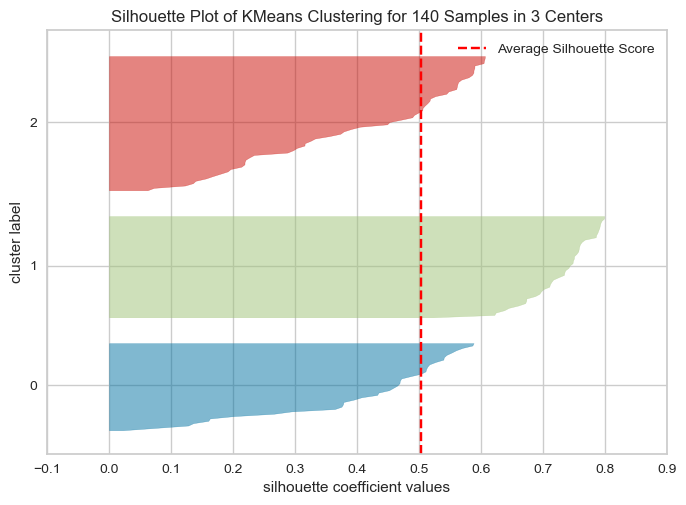

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 140 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [41]:
model = KMeans(n_clusters=3)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)
visualizer.show()

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


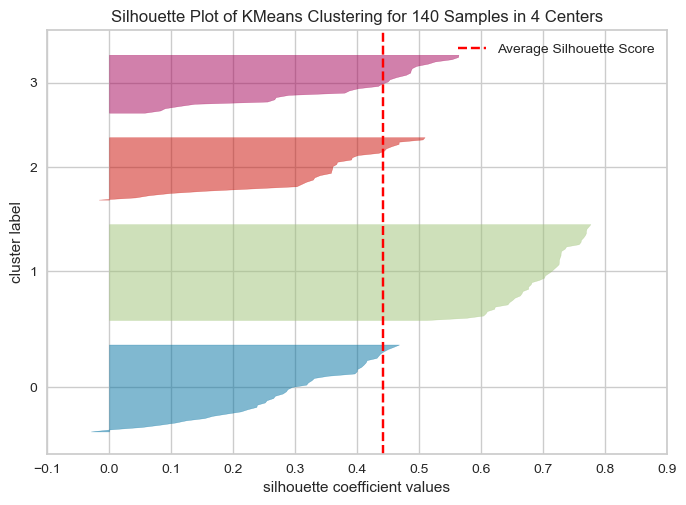

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 140 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
model = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)
visualizer.show()

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


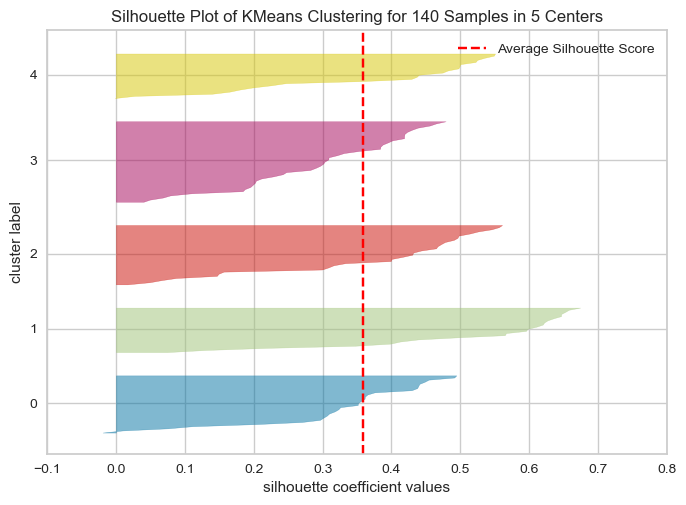

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 140 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
model = KMeans(n_clusters=5)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)
visualizer.show()

Best K clusters: 2

In [44]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


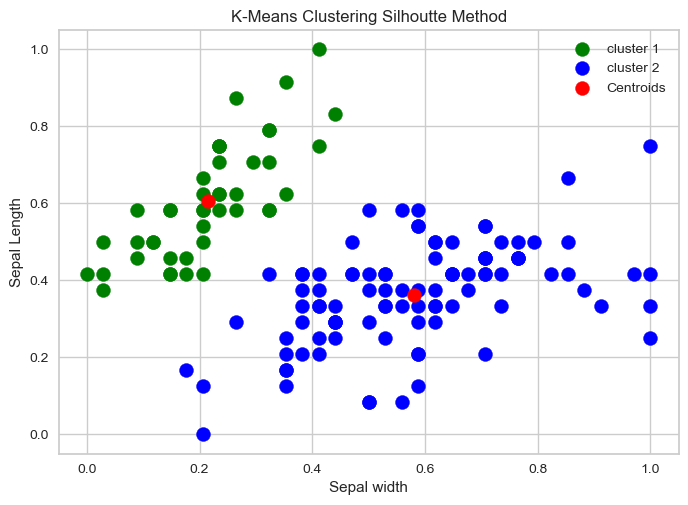

In [45]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='green', label='cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0] ,kmeans.cluster_centers_[:, 1],s=100 , c='red', label='Centroids')
plt.title('K-Means Clustering Silhoutte Method')
plt.xlabel('Sepal width')
plt.ylabel('Sepal Length')
plt.legend()

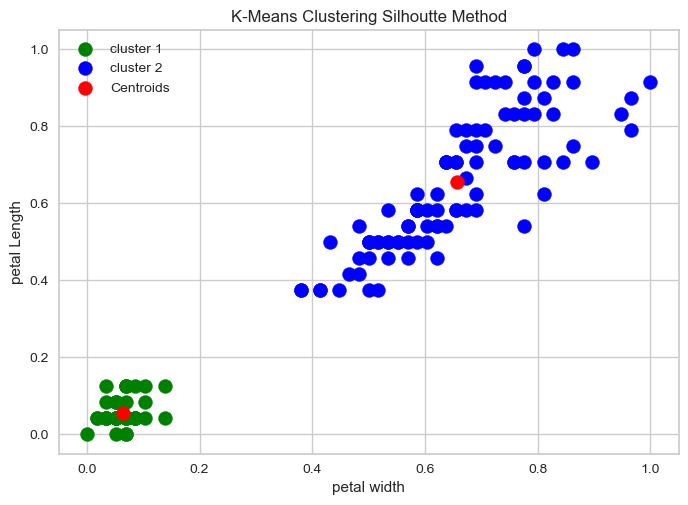

In [46]:
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s=100, c='green', label='cluster 1')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s=100, c='blue', label='cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 2] ,kmeans.cluster_centers_[:, 3],s=100 , c='red', label='Centroids')
plt.title('K-Means Clustering Silhoutte Method')
plt.xlabel('petal width')
plt.ylabel('petal Length')
plt.legend()